In [15]:
import pandas as pd
import os, sys
import toml
sys.path.append(os.path.join(os.getcwd(),r'..\..\..'))
sum_config = toml.load(os.path.join(os.getcwd(),r'../../../configuration/summary_configuration.toml'))
# from settings import comparison_dict

In [48]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in sum_config['comparison_dict'].items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [49]:
geog = 'county'
geog_col = 'hh_county'

# Population

In [50]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_population.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Persons')

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,"188,750","188,750","188,750"
Kitsap,"4,627","4,627","4,627"
Pierce,"24,260","24,260","24,260"
Snohomish,"11,861","11,861","11,861"


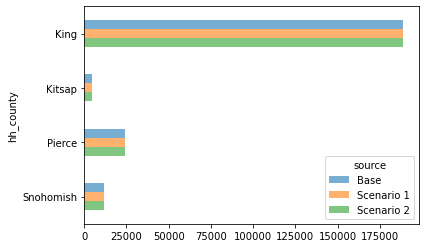

In [51]:
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Employment

In [52]:
df = load_data('2_employment.csv', geog)
df['Workers'] = df['Paid Full-Time Worker']+df['Paid Part-Time Worker']
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Workers')
df

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,"117,505","117,505","117,505"
Kitsap,"2,293","2,293","2,293"
Pierce,"11,958","11,958","11,958"
Snohomish,"5,885","5,885","5,885"


# Transit Ridership

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,"361,176","319,501","326,818"
Kitsap,"20,346","17,023","15,894"
Pierce,"41,272","34,466","37,383"
Snohomish,"39,334","33,472","37,010"


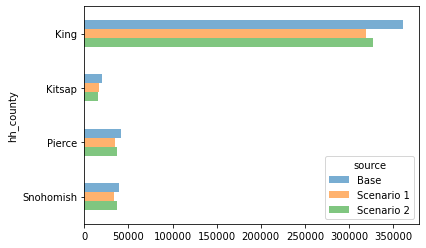

In [53]:
df = load_data('3_transit_trips.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='trexpfac')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

## Transit Commute Mode Share

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,7.2%,5.9%,6.5%
Kitsap,6.2%,5.0%,4.7%
Pierce,4.1%,3.3%,3.7%
Snohomish,3.4%,2.8%,3.2%


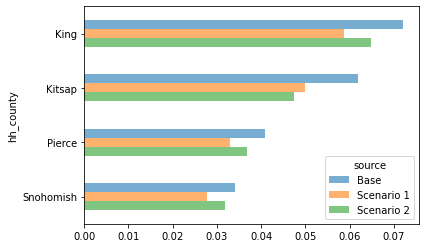

In [54]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('4_transit_commute_share.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='mode_share')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# VMT

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,"1,217,909","1,078,532","1,052,757"
Kitsap,"30,572","26,230","25,865"
Pierce,"225,234","204,121","198,041"
Snohomish,"138,622","126,514","124,738"
Total,"1,612,337","1,435,397","1,401,401"


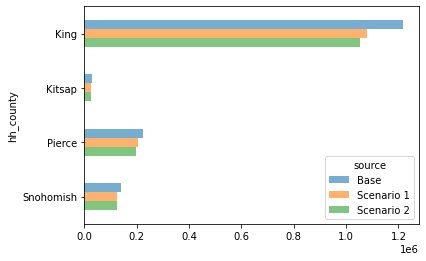

In [55]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,"1,217,909","1,078,532","1,052,757"
Kitsap,"30,572","26,230","25,865"
Pierce,"225,234","204,121","198,041"
Snohomish,"138,622","126,514","124,738"
Total,"1,612,337","1,435,397","1,401,401"


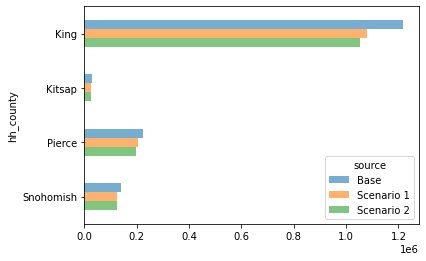

In [56]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

# Delay
**Total Delay Hours per Day**

source,Base,Scenario 1,Scenario 2
hh_county,,,
King,"6,042","3,615","3,568"
Kitsap,9,0,0
Pierce,"1,036",685,625
Snohomish,802,597,579
Total,"7,890","4,897","4,772"


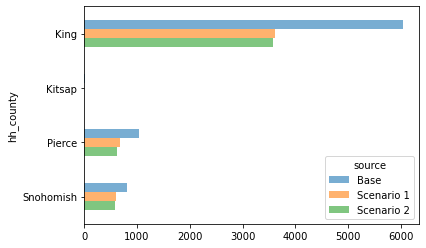

In [57]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Total Delay Hours')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

**Delay Hours per Household**


source,Base,Scenario 1,Scenario 2
hh_county,,,
King,3.2,1.9,1.9
Kitsap,0.2,0.0,0.0
Pierce,4.8,3.2,2.9
Snohomish,8.3,6.2,6.0
Total,16.6,11.3,10.8


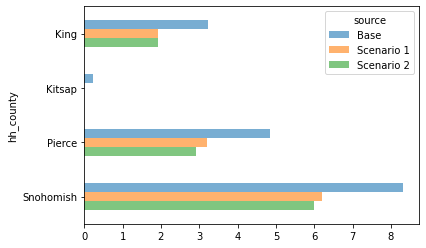

In [58]:
pd.options.display.float_format = '{:0,.1f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', 
                    aggfunc='sum', values='Avg. Minutes of Delay per Household')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df